In [3]:
import clana.optimize
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import networkx as nx
import math
import os

In [4]:
cm = np.array([
 [100,   0,   0,   0,   0,  25,   4,   0,   0,   0],
 [  0, 100,   0,  10,   3,   0,   0,   0,   5,  20],
 [  0,   0, 200,   0,   0,   0,   0,  20,   0,   0],
 [  0,   0,   0, 180,  10,   0,   0,   0,   0,   0],
 [  0,   0,   0,  10, 220,   0,   0,   0,  10,   0],
 [  0,   0,   0,   0,   0, 250,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   1, 300,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0, 180,   0,   0],
 [  0,   0,   0,  20,   0,   0,   0,   0, 150,   5],
 [  0,   0,   0,  10,  30,   0,   0,   0,   0, 100]])

classes = np.arange(10)



In [ ]:
cm = np.genfromtxt('model/cm.csv', delimiter=',')
print(cm.shape)
# classes = np.arange(cm.shape[0])
dir = "dataset/names.csv"
classes = np.genfromtxt(dir, delimiter=',', dtype=str)
classes

In [16]:
def show_cm(cm, classes, diag_zero = False, ax=None, show=True, rotation=None):
    cm_copy = cm.copy()
    if diag_zero:
        np.fill_diagonal(cm_copy, 0)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_copy, display_labels=classes)

    disp.plot(ax=ax)
    
    if rotation:
        plt.xticks(rotation=rotation)
    if show:
        plt.show()

def show_cm_with_without_diag(cm, clases):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))
    show_cm(cm, classes, ax=axes[0], show=False)
    show_cm(cm, classes, diag_zero=True, ax=axes[1])

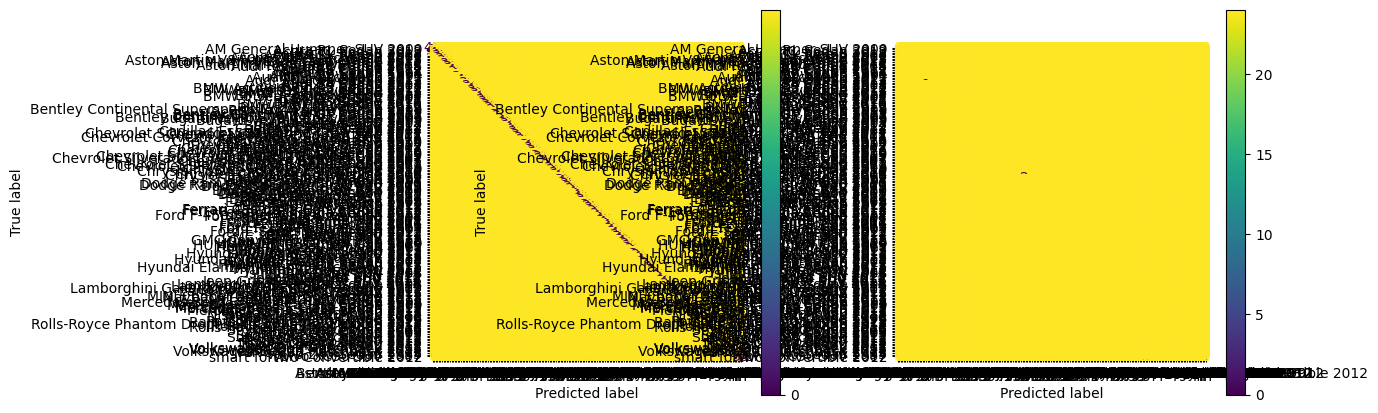

In [17]:
show_cm_with_without_diag(cm, classes)

In [9]:
result = clana.optimize.simulated_annealing(cm)
result

c:\Python312\Lib\site-packages\clana\optimize.py:111: RuntimeWarning: overflow encountered in exp
  hot_prob_thresh = min(1, np.exp(-(tmp_score - current_score) / temp))


OptimizationResult(cm=array([[100,  20,   3,  10,   5,   0,   0,   0,   0,   0],
       [  0, 100,  30,  10,   0,   0,   0,   0,   0,   0],
       [  0,   0, 220,  10,  10,   0,   0,   0,   0,   0],
       [  0,   0,  10, 180,   0,   0,   0,   0,   0,   0],
       [  0,   5,   0,  20, 150,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 250,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  25, 100,   4,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0, 300,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 200,  20],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 180]]), perm=array([1, 9, 4, 3, 8, 5, 0, 6, 2, 7]))

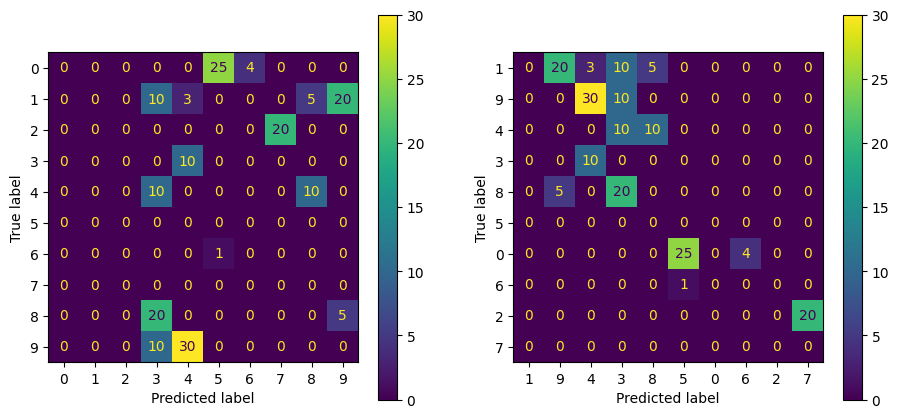

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))
show_cm(cm, classes, ax=axes[0], diag_zero=True, show=False)
show_cm(result.cm, classes[result.perm], diag_zero=True, ax=axes[1])

In [22]:
cm_copy = cm.copy()
cm_copy[cm_copy < 3] = 0
G = nx.from_numpy_array(cm_copy)
composantes_connexes = list(nx.connected_components(G))
composantes_connexes = [[e for e in s] for s in composantes_connexes]
composantes_connexes

[[0],
 [1],
 [2, 3, 5],
 [4],
 [6],
 [33, 7, 8, 9, 10, 29],
 [24, 11, 12],
 [17, 19, 13],
 [14],
 [18, 15],
 [16],
 [20],
 [21, 22, 23],
 [25],
 [26],
 [34, 27, 28],
 [30],
 [31],
 [32],
 [35],
 [36],
 [37],
 [38],
 [40, 41, 39],
 [42],
 [43],
 [44, 45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [72, 121, 51, 53],
 [52],
 [54],
 [55],
 [56, 58],
 [57],
 [59, 60, 119],
 [61],
 [65, 62],
 [63],
 [64],
 [66, 67, 68, 69, 70],
 [71],
 [73],
 [74, 139],
 [75],
 [90, 76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82, 83],
 [84],
 [85],
 [86, 87],
 [88, 89],
 [91],
 [92],
 [93],
 [94, 95],
 [96, 165],
 [97],
 [98],
 [99],
 [100, 101],
 [102],
 [103],
 [104],
 [105],
 [106],
 [107],
 [108],
 [109],
 [110],
 [111],
 [112],
 [113],
 [114],
 [115],
 [116],
 [117],
 [118],
 [120],
 [122],
 [123, 124],
 [125],
 [126],
 [127],
 [128],
 [129],
 [136, 130],
 [131],
 [180, 132, 183],
 [133],
 [134],
 [135],
 [137],
 [138],
 [140],
 [141],
 [142],
 [143],
 [144, 145],
 [146, 147],
 [148],
 [152, 149],
 [150],
 [159

In [23]:
sub_cms = [
    cm[sub,:][:,sub]
    for sub in composantes_connexes
]
sub_classes = [
    classes[sub]
    for sub in composantes_connexes
]
print(sub_classes)
sub_cms

[array(['AM General Hummer SUV 2000'], dtype='<U54'), array(['Acura RL Sedan 2012'], dtype='<U54'), array(['Acura TL Sedan 2012', 'Acura TL Type-S 2008',
       'Acura Integra Type R 2001'], dtype='<U54'), array(['Acura TSX Sedan 2012'], dtype='<U54'), array(['Acura ZDX Hatchback 2012'], dtype='<U54'), array(['BMW M3 Coupe 2012', 'Aston Martin V8 Vantage Convertible 2012',
       'Aston Martin V8 Vantage Coupe 2012',
       'Aston Martin Virage Convertible 2012',
       'Aston Martin Virage Coupe 2012', 'BMW 3 Series Wagon 2012'],
      dtype='<U54'), array(['Audi TT RS Coupe 2012', 'Audi RS 4 Convertible 2008',
       'Audi A5 Coupe 2012'], dtype='<U54'), array(['Audi 100 Wagon 1994', 'Audi S6 Sedan 2011', 'Audi TTS Coupe 2012'],
      dtype='<U54'), array(['Audi R8 Coupe 2012'], dtype='<U54'), array(['Audi TT Hatchback 2011', 'Audi V8 Sedan 1994'], dtype='<U54'), array(['Audi 100 Sedan 1994'], dtype='<U54'), array(['Audi S5 Convertible 2012'], dtype='<U54'), array(['Audi S5 Coupe 201

[array([[41.]]),
 array([[42.]]),
 array([[26.,  4.,  1.],
        [ 0., 43.,  0.],
        [ 0.,  3., 37.]]),
 array([[40.]]),
 array([[35.]]),
 array([[39.,  0.,  0.,  0.,  0.,  0.],
        [ 3., 35.,  2.,  1.,  0.,  1.],
        [ 0.,  4., 33.,  0.,  3.,  0.],
        [ 2.,  8.,  0., 23.,  0.,  0.],
        [ 0.,  0.,  4.,  0., 32.,  0.],
        [ 5.,  0.,  0.,  0.,  0., 37.]]),
 array([[29., 10.,  2.],
        [ 5., 30.,  5.],
        [ 3.,  3., 32.]]),
 array([[28.,  2.,  4.],
        [ 2., 28., 10.],
        [ 0.,  5., 36.]]),
 array([[41.]]),
 array([[34.,  3.],
        [ 2., 33.]]),
 array([[41.]]),
 array([[41.]]),
 array([[25.,  4., 11.],
        [ 7., 30.,  0.],
        [16.,  2., 24.]]),
 array([[33.]]),
 array([[41.]]),
 array([[33.,  0.,  4.],
        [ 0., 36.,  0.],
        [ 0.,  3., 37.]]),
 array([[33.]]),
 array([[43.]]),
 array([[40.]]),
 array([[39.]]),
 array([[38.]]),
 array([[35.]]),
 array([[38.]]),
 array([[40.,  4.,  1.],
        [ 6., 28.,  0.],
        [

nb classes : 31


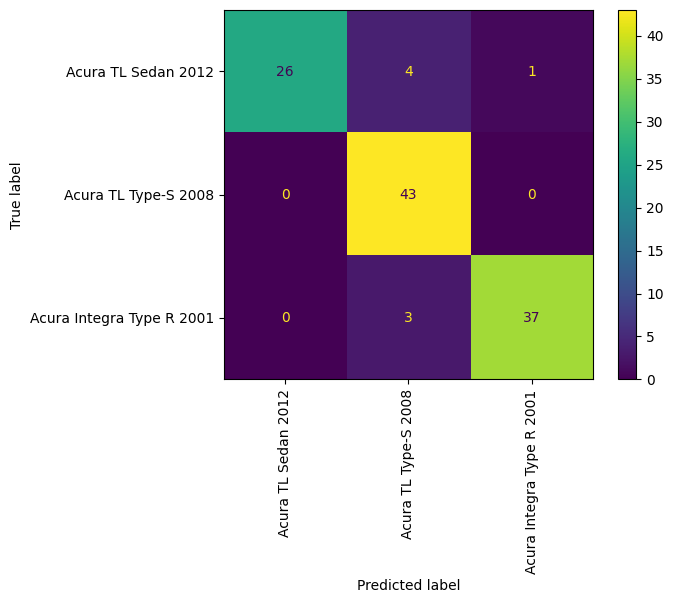

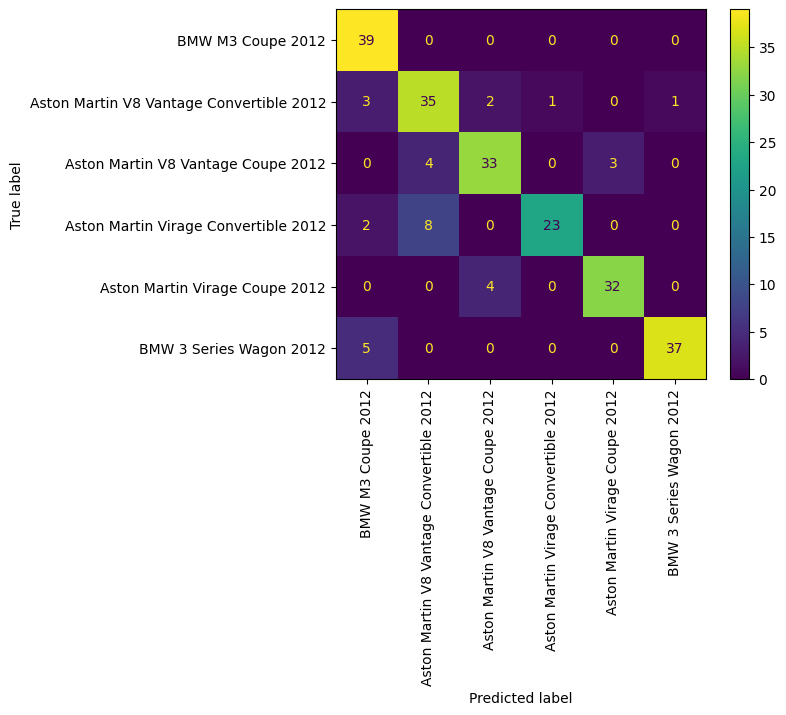

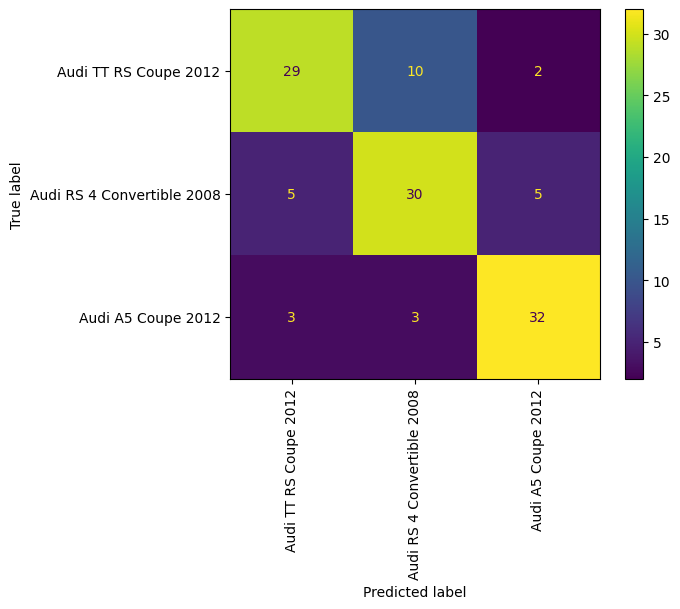

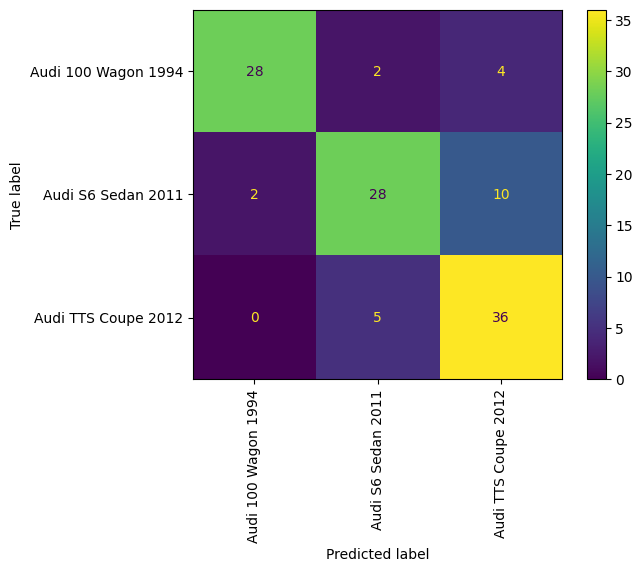

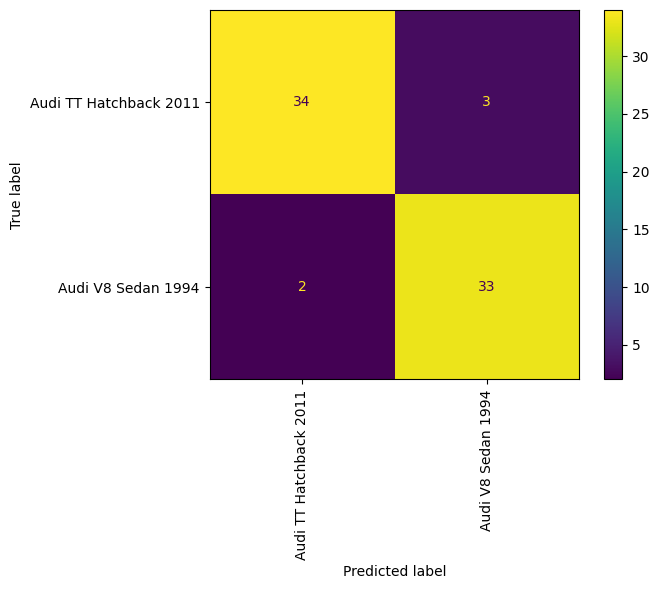

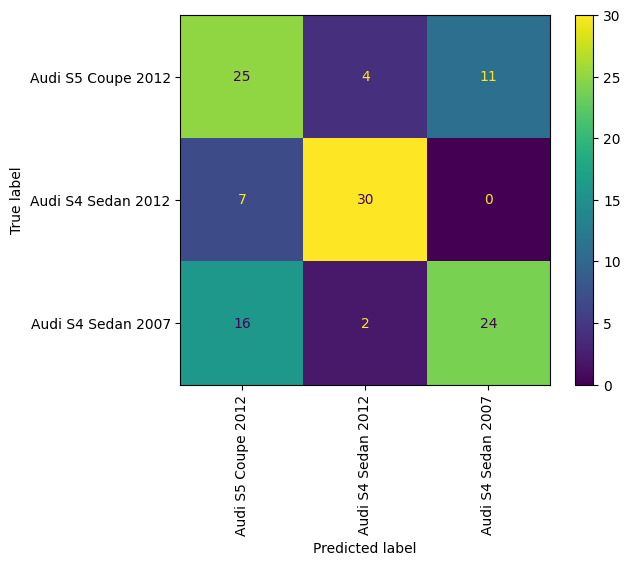

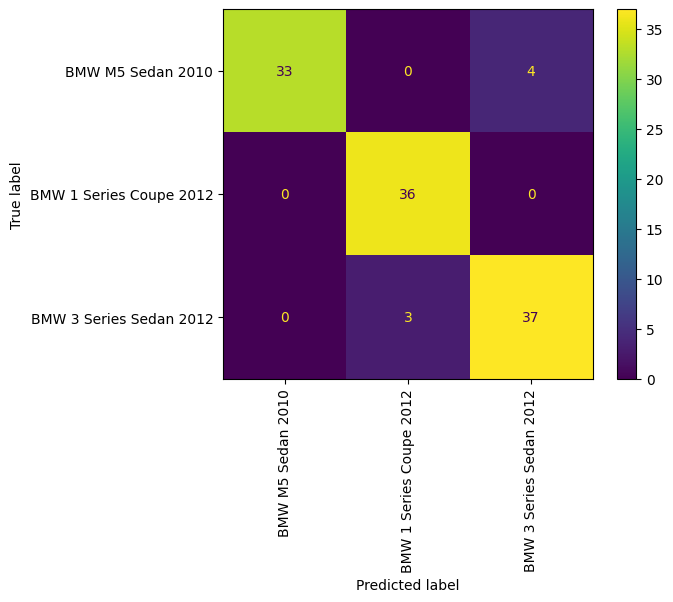

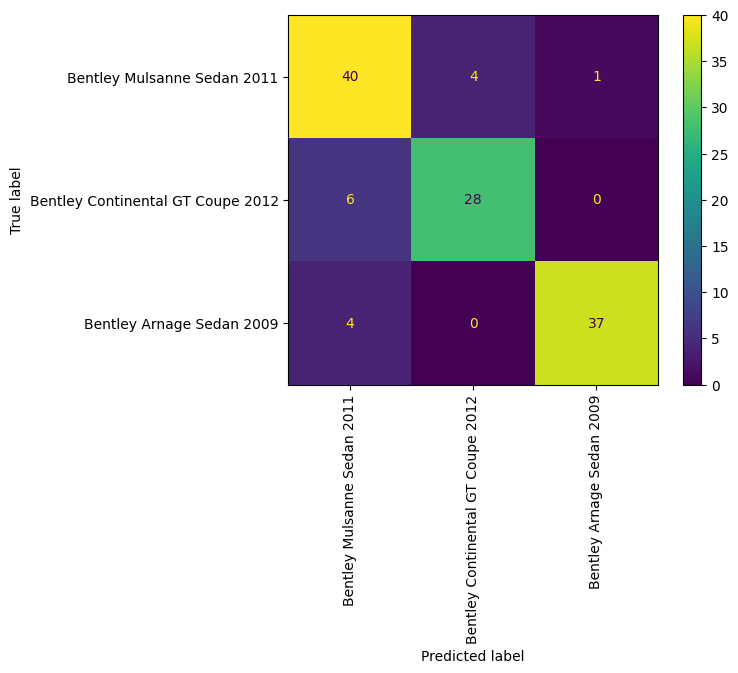

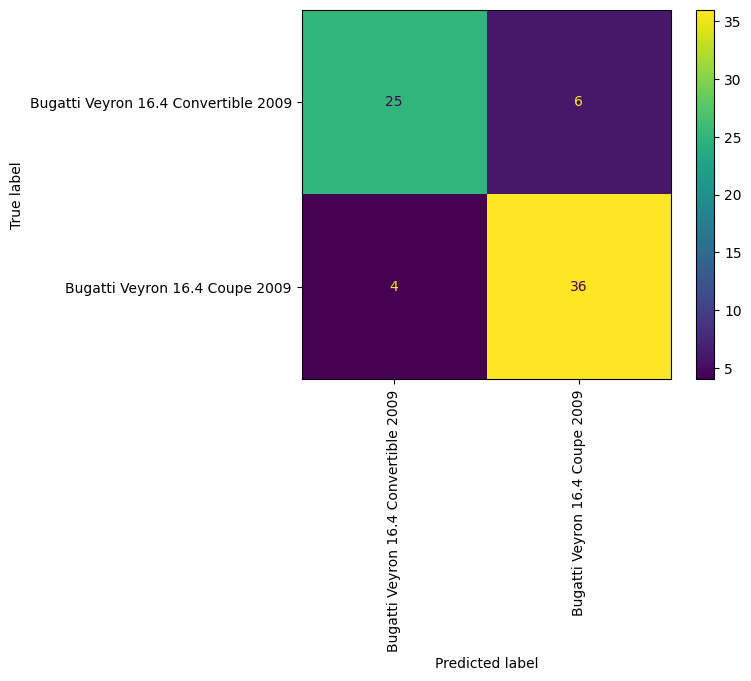

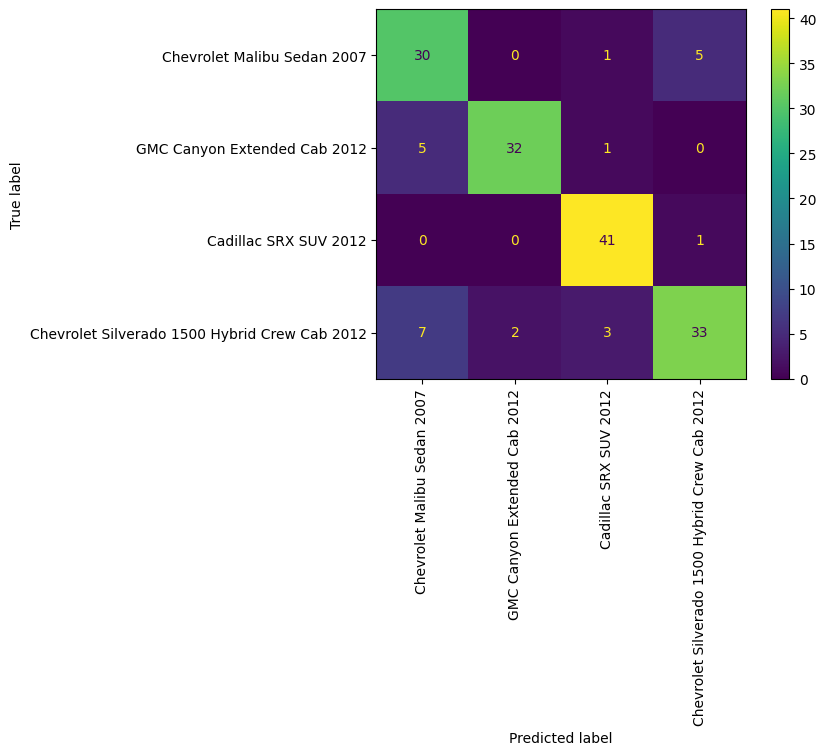

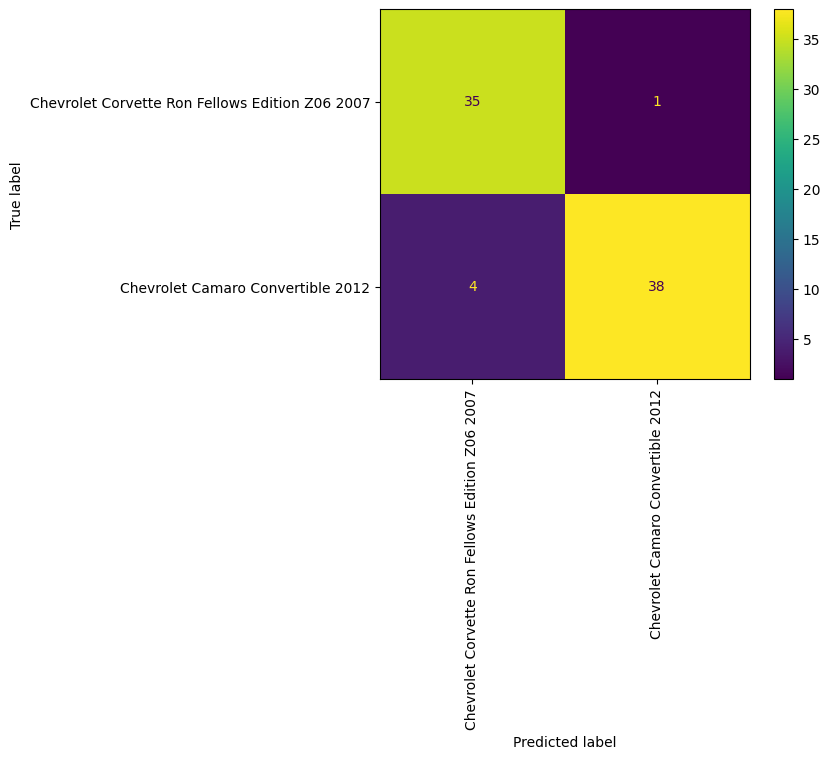

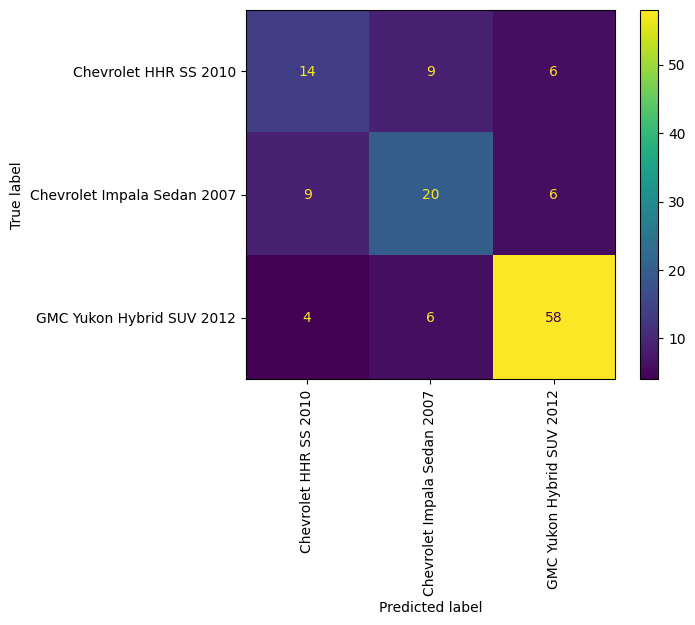

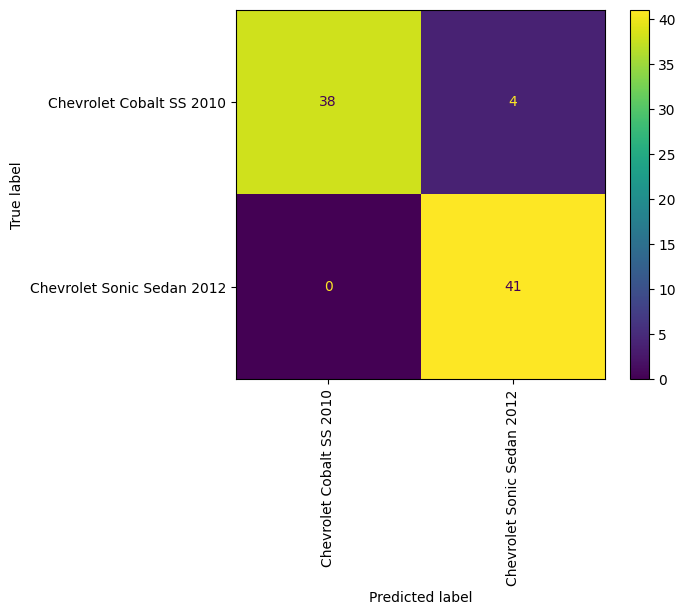

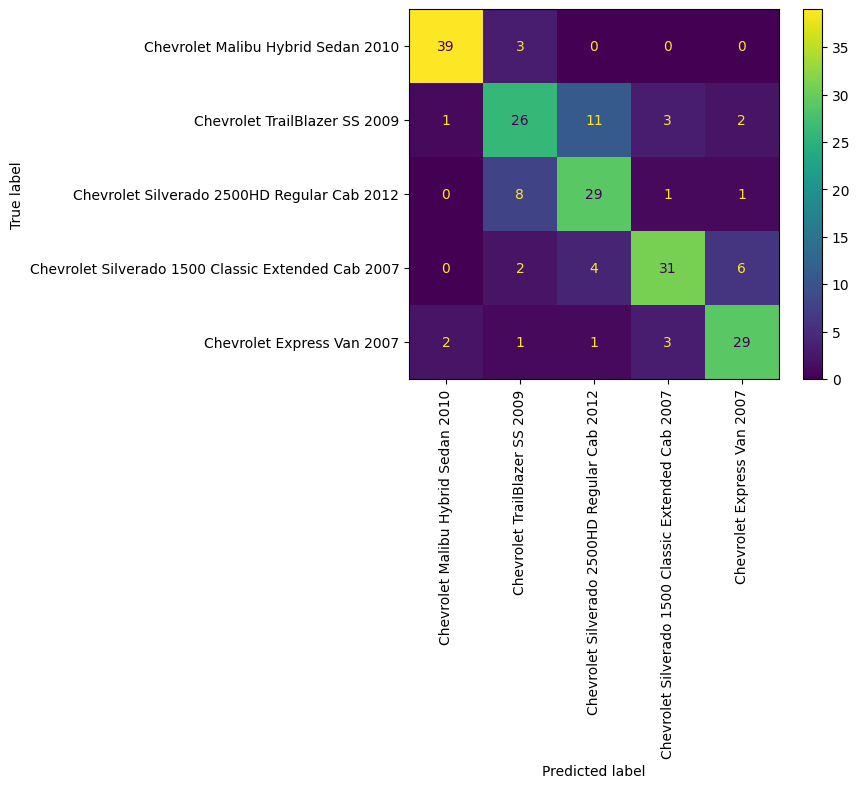

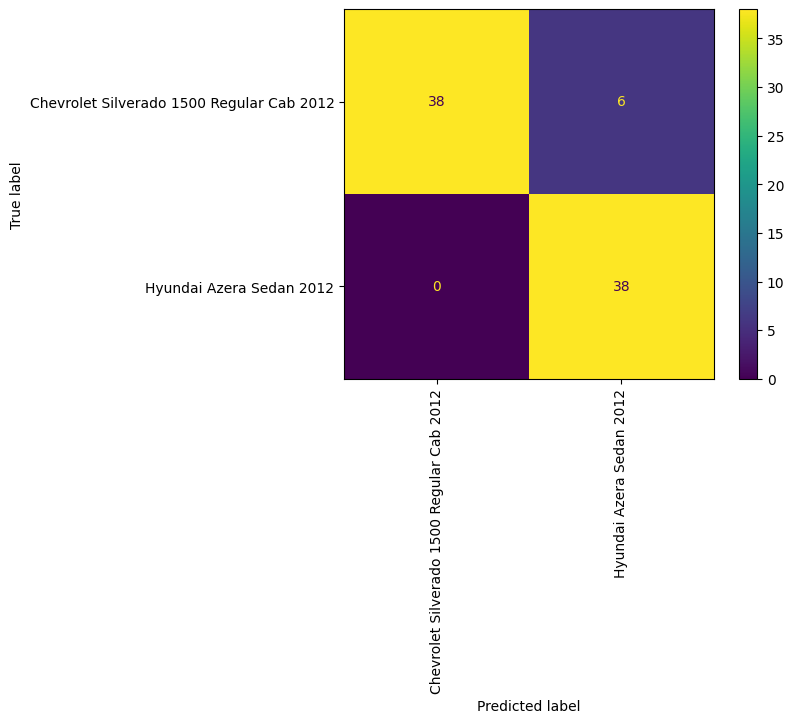

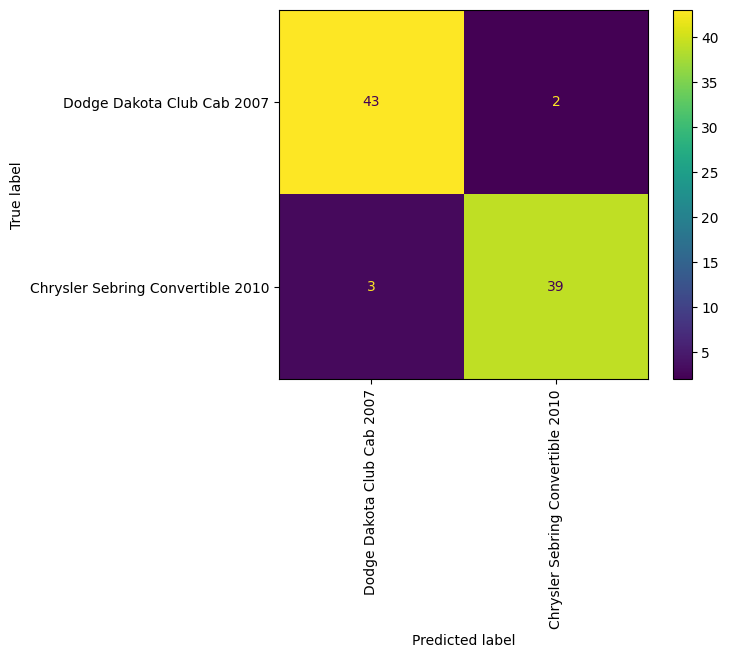

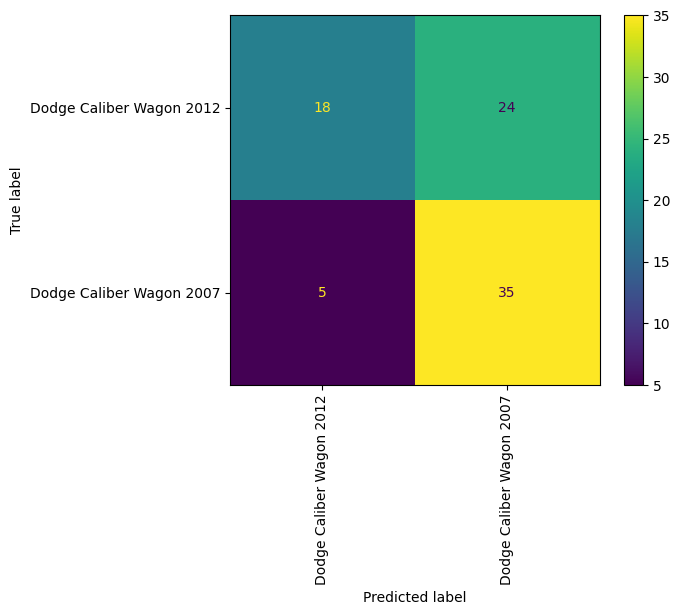

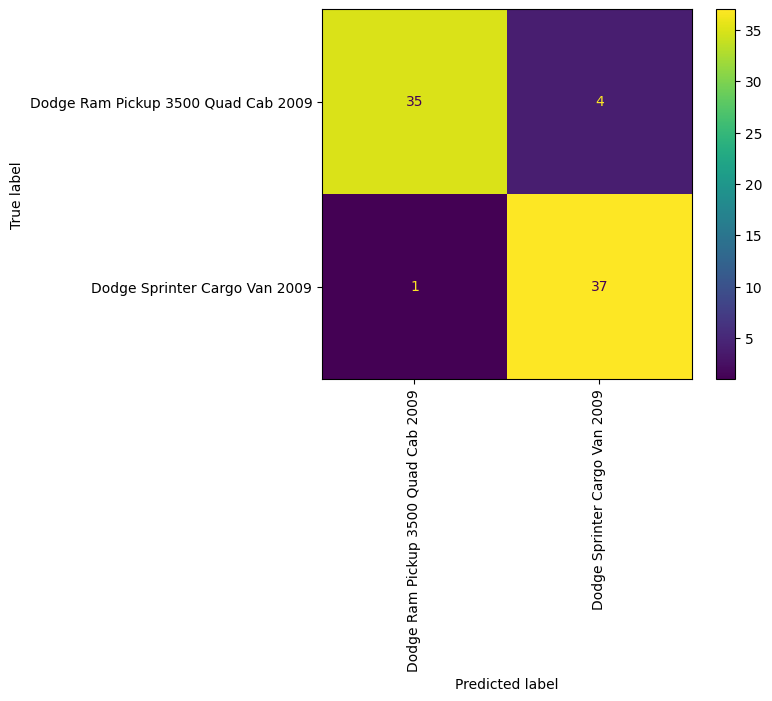

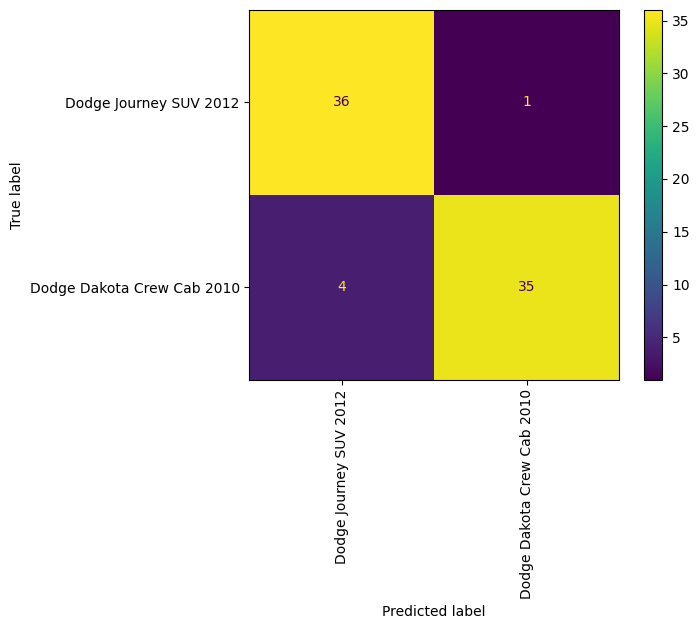

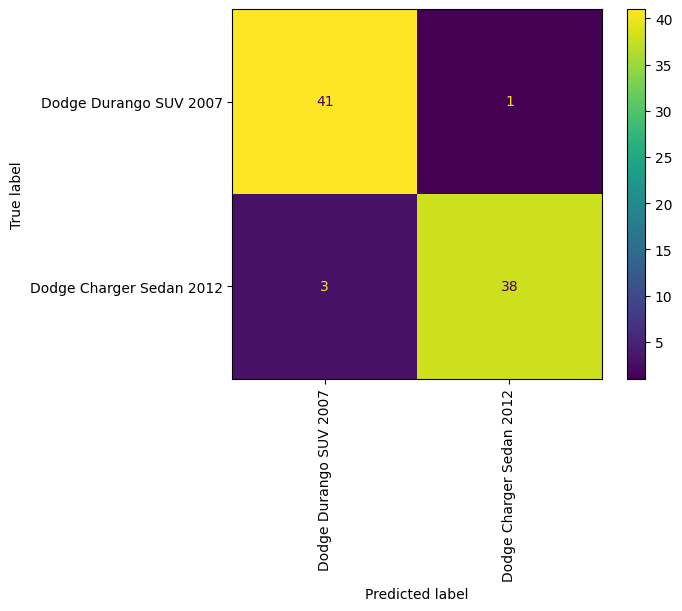

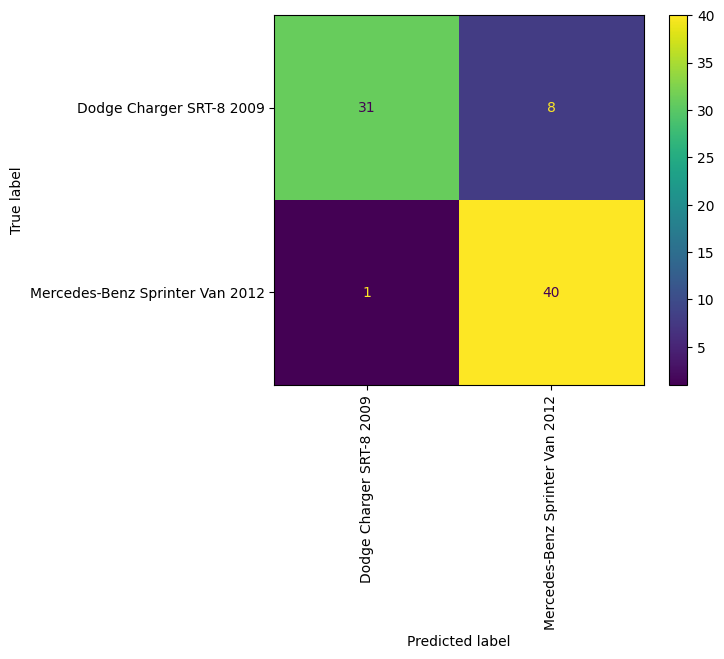

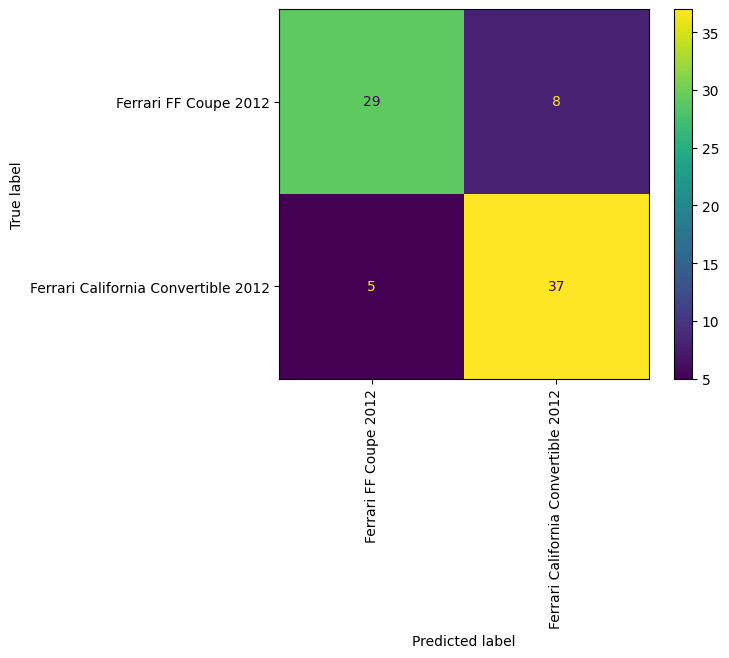

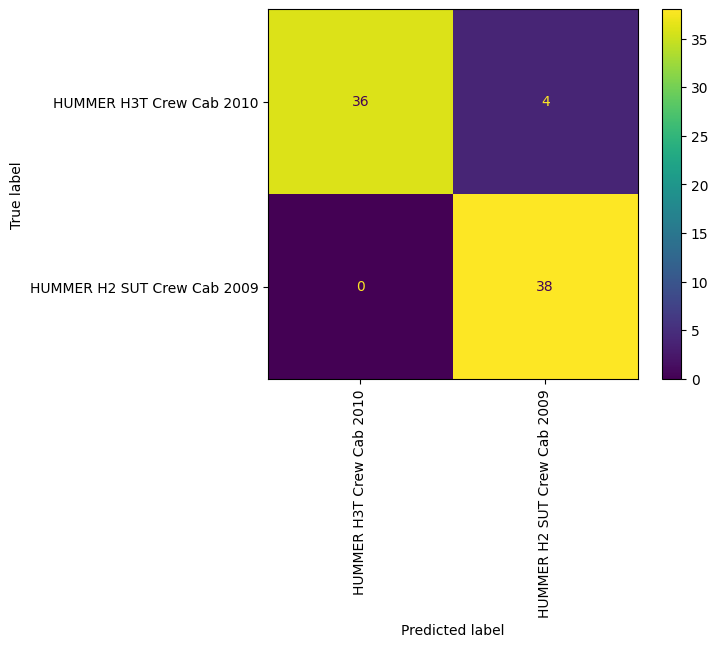

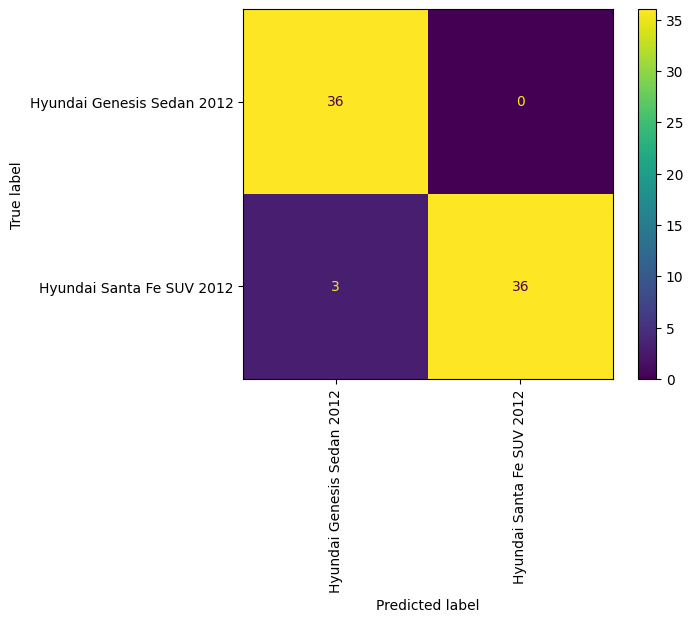

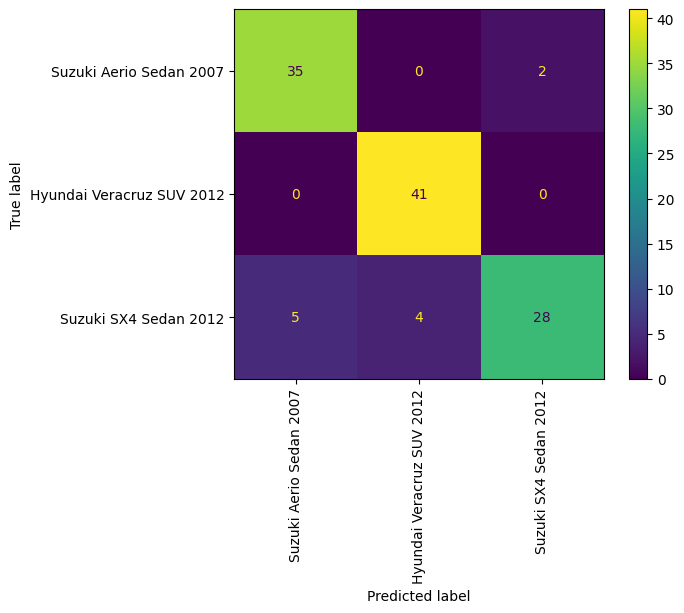

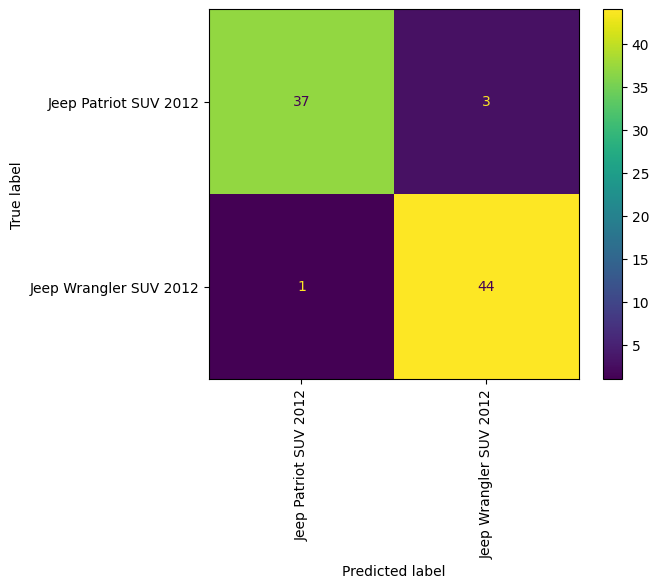

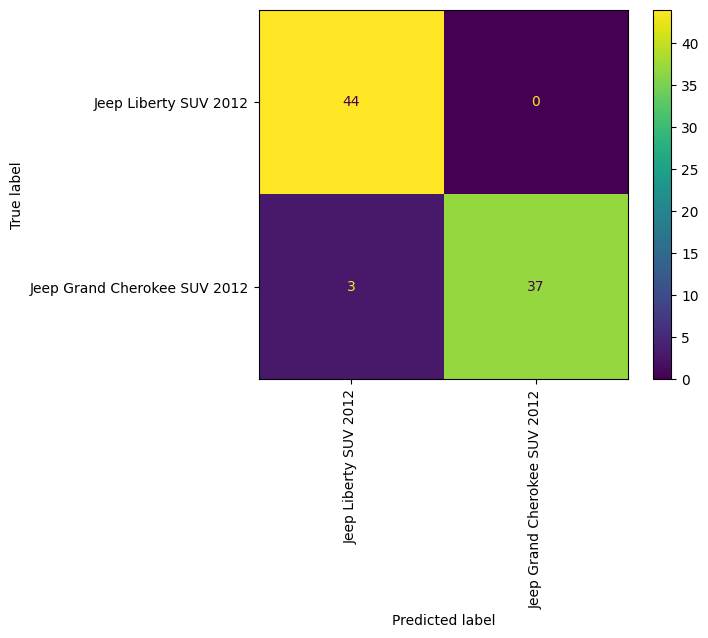

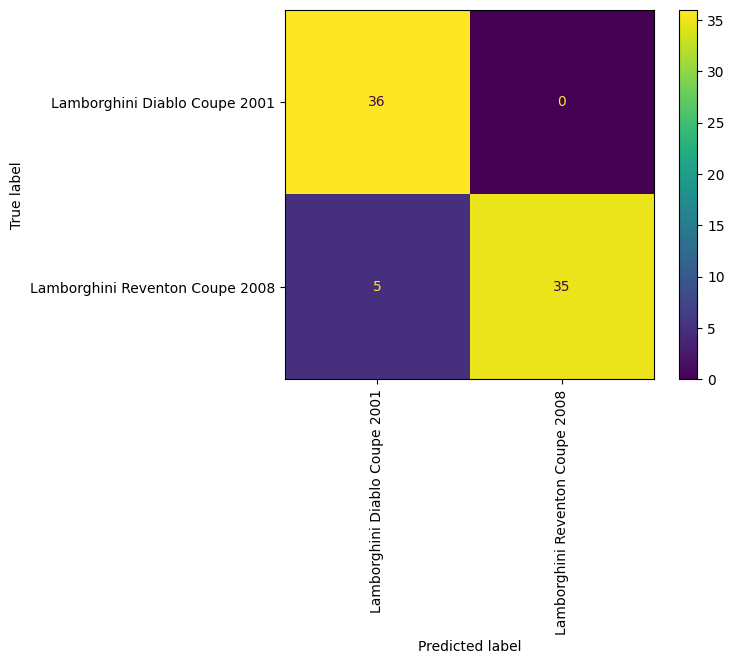

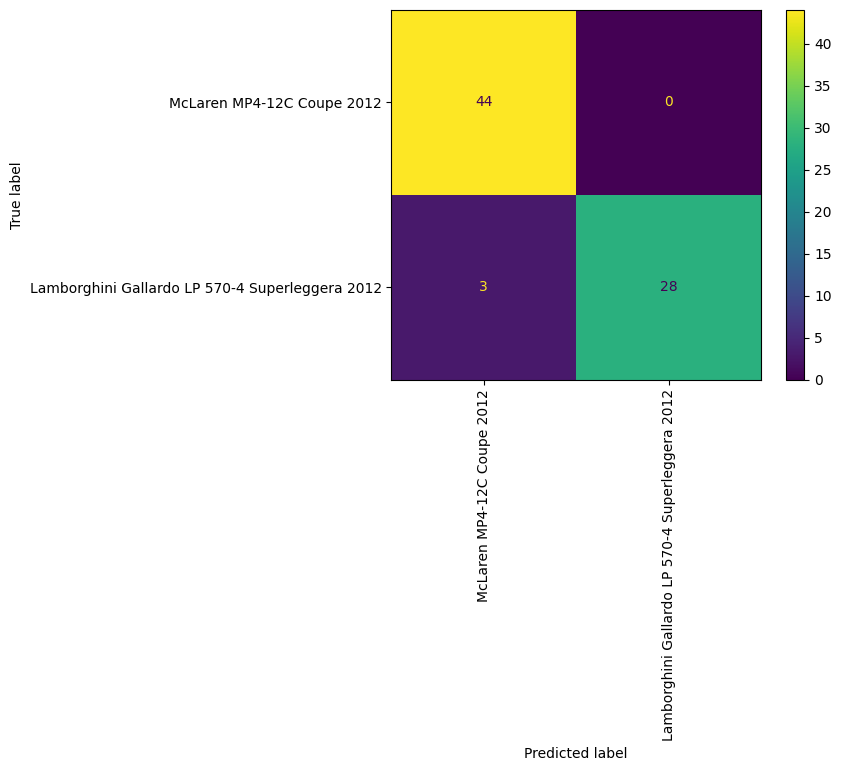

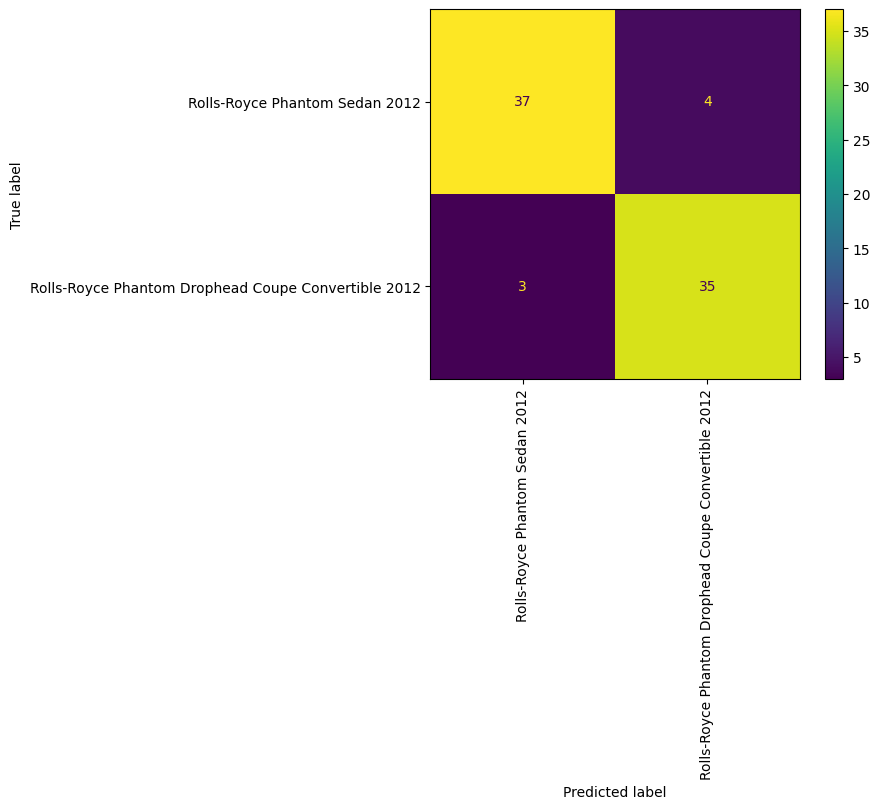

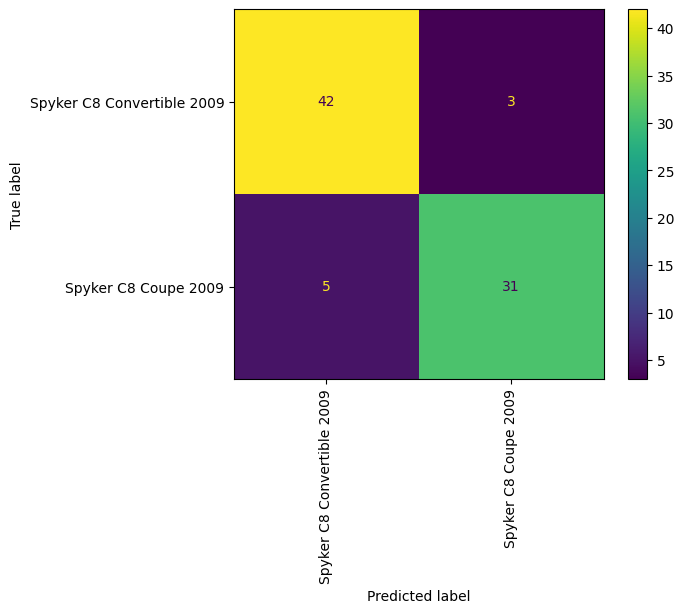

In [24]:
# drop the too big cms
sub_cms, sub_classes = list(zip(*[
    (sub_cm, sub_classes)
    for sub_cm, sub_classes in zip(sub_cms, sub_classes)
    if 1 < sub_cm.shape[0] < 15
]))

print("nb classes :", len(sub_classes))

n_per_line = 1
nrows = math.ceil(len(sub_classes) / n_per_line)
    
if False:
    fig, axes = plt.subplots(nrows=nrows, ncols=n_per_line, figsize=(11, 5 * nrows))
    if len(axes.shape) == 1:
        axes = axes.reshape((nrows, n_per_line))

for sub_cm, sub_class, i in zip(sub_cms, sub_classes, range(len(sub_cms))):
    show_cm(sub_cm, sub_class, diag_zero=False, rotation=90)